# <center> Hepatitis Survival using Ensembles </center>

___

Ensemble refers to aggregation of predictions of different models based on weighted average or majority vote. Models can be different in their selection of sample set, feature set, hyperparameter and/or model family.
It is used with tree models because decision trees are high variance models i.e. small change in data impacts the decision boundary considerably. Ensembles can be used with any classifier.

<img src="image/EnsembleImage.jpeg" alt="https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e" width="500" height="400">


Ensembles can be in form of Bagging or Boosting.

<img src="img/bagging_boosting.png" alt="https://www.kdnuggets.com/" width="700" height="700">

___

## Hepatitis Data

We will use [Hepatitis Dataset](https://archive.ics.uci.edu/ml/datasets/hepatitis). The data set is obtained from UCI machine learning repository. There are 155 observations and 19 features/ attributes where 13 attributes are binary while 6 attributes are discrete valued. The observations are catogarized in two classes classes die and live. 

| Feature | Description |
| --- | --- |
| target | DIE (1) , LIVE (2) |
| AGE | 10, 20, 30, 40, 50, 60, 70, 80 |
| SEX | male, female |
| STEROID | no, yes |
| ANTIVIRALS | no, yes |
| FATIGUE | no, yes |
| MALAISE | no, yes |
| ANOREXIA | no, yes |
| LIVER BIG | no, yes |
| LIVER FIRM | no, yes |
| SPLEEN PALPABLE | no, yes |
| SPIDERS | no, yes |
| ASCITES | no, yes |
| VARICES | no, yes |
| BILIRUBIN | 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 |
| ALK PHOSPHATE | 33, 80, 120, 160, 200, 250 |
| SGOT | 13, 100, 200, 300, 400, 500, |
| ALBUMIN | 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 |
| PROTIME | 10, 20, 30, 40, 50, 60, 70, 80, 90 |
| HISTOLOGY | no, yes |

**The goal is to classify whether the hepatitis patient will survive or not.**
___

## Load the libraries

In [1]:
import pandas as pd

# skip warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

## Load Data

In [2]:
hepatitis = pd.read_csv("Data/hepatitis.data")

In [3]:
colnames = ['target', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver big', 
            'liver firm', 'spleen palpable', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk phosphate', 
            'sgot', 'albumin', 'protime', 'histology']

#### Read file "hepatitis.data"  in hepatitis

hepatitis = pd.read_csv("Data/hepatitis.data", names = colnames)
hepatitis.shape

(155, 20)

There are a total of 155 customers in the data set and 20 variables. 

## Exploratory Data Analysis

Let us take a look at a portion of the data.

We will create a function to set all needed [Options in Python](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [4]:
def set_pandas_display_options() :

    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.precision = 3

    
    
set_pandas_display_options()

In [5]:
hepatitis.head()

,target,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Let us check if all columns are in appropriate data format.

In [6]:
hepatitis.dtypes

target              int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver big          object
liver firm         object
spleen palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [7]:
####  Read data with na_values="?"
hepatitis = pd.read_csv("Data/hepatitis.data", na_values = "?", names = colnames)

hepatitis.dtypes

target               int64
age                  int64
sex                  int64
steroid            float64
antivirals           int64
fatigue            float64
malaise            float64
anorexia           float64
liver big          float64
liver firm         float64
spleen palpable    float64
spiders            float64
ascites            float64
varices            float64
bilirubin          float64
alk phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology            int64
dtype: object

Now the data types are corrected. So, ? was the only invalid value.

Let us check the distribution of our target variable.

In [8]:
#### Calculate value counts of target  

hepatitis['target'].value_counts()

2    123
1     32
Name: target, dtype: int64

The data is imbalanced with 80% data for LIVE vs 20% data for DIE.

Let us seperate our numerical and categorical attributes.

In [9]:
cat_cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver big', 
            'liver firm', 'spleen palpable', 'spiders', 'ascites', 'varices', 'histology']

# create a list for all numerical column names
num_cols = hepatitis.columns[~hepatitis.columns.isin(cat_cols)]

# remove target column
num_cols = num_cols.delete(0)

num_cols

Index(['age', 'bilirubin', 'alk phosphate', 'sgot', 'albumin', 'protime'], dtype='object')

We will convert all categorical variable to category type.

#### Type Conversion

In [10]:
### Convert type of categorical columns to catego
hepatitis[cat_cols] = hepatitis[cat_cols].apply(lambda x : x.astype('category'))


#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.

We will check there are no invalid values in any of the categorical variables.

In [11]:
for x in cat_cols :
    print(x, '----->>', hepatitis[x].unique(), '\n')

sex ----->> [2, 1]
Categories (2, int64): [2, 1] 

steroid ----->> [1.0, 2.0, NaN]
Categories (2, float64): [1.0, 2.0] 

antivirals ----->> [2, 1]
Categories (2, int64): [2, 1] 

fatigue ----->> [2.0, 1.0, NaN]
Categories (2, float64): [2.0, 1.0] 

malaise ----->> [2.0, 1.0, NaN]
Categories (2, float64): [2.0, 1.0] 

anorexia ----->> [2.0, 1.0, NaN]
Categories (2, float64): [2.0, 1.0] 

liver big ----->> [1.0, 2.0, NaN]
Categories (2, float64): [1.0, 2.0] 

liver firm ----->> [2.0, 1.0, NaN]
Categories (2, float64): [2.0, 1.0] 

spleen palpable ----->> [2.0, 1.0, NaN]
Categories (2, float64): [2.0, 1.0] 

spiders ----->> [2.0, 1.0, NaN]
Categories (2, float64): [2.0, 1.0] 

ascites ----->> [2.0, 1.0, NaN]
Categories (2, float64): [2.0, 1.0] 

varices ----->> [2.0, NaN, 1.0]
Categories (2, float64): [2.0, 1.0] 

histology ----->> [1, 2]
Categories (2, int64): [1, 2] 



In [12]:
hepatitis.isnull().sum()

target              0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver big          10
liver firm         11
spleen palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64


Let us check numerical data as well.

In [13]:
hepatitis[num_cols].describe()

,age,bilirubin,alk phosphate,sgot,albumin,protime
count,155.000,149.000,126.000,151.000,139.000,88.000
mean,41.200,1.428,105.325,85.894,3.817,61.852
std,12.566,1.212,51.508,89.651,0.652,22.875
min,7.000,0.300,26.000,14.000,2.100,0.000
25%,32.000,0.700,74.250,31.500,3.400,46.000
50%,39.000,1.000,85.000,58.000,4.000,61.000
75%,50.000,1.500,132.250,100.500,4.200,76.250
max,78.000,8.000,295.000,648.000,6.400,100.000


> Does data looks clean?

Let us check for percentage of NA values for each feature.

In [14]:
#### Check null values in data 



<div class="alert alert-block alert-info"><b> 
    
- Observations?

</b></div>

In [15]:
#### Display distribution of variable protime

import matplotlib.pyplot as plt
import seaborn as sns

hepatitis.protime.hist(bins = 50)

The range of the variable is quite wide compared to other features and values are very spread out so, which imputataion technique to use to impute it?.

# Model Building

___

We will seperate our independent variables and target variable.

In [16]:
# independent variables
X = hepatitis.drop('target', axis = 1)

# dependent variable
y = hepatitis["target"]


### Function to prepare data

We will write a function to prepare data for following functions.

- Train and Test Split
- Fit the Imputer on Train Data

#### KNN Imputation

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

num_imputer = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors = 5))
cat_imputer = IterativeImputer(estimator = KNeighborsClassifier(n_neighbors = 5))

In [18]:
from sklearn.model_selection import train_test_split

def prepare_data(X, y, split_size = 0.3) :
    
    
    ####Split data 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = split_size) 

    ##Fit numeric imputer
    num_imputer.fit(X_train[num_cols])
    
    
    ##Fit categorical imputer
    cat_imputer.fit(X_train[cat_cols])
    

    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [19]:
# call function to prepare data
X_train, X_test, y_train, y_test = prepare_data(X, y, 0.2)

(124, 19)
(31, 19)


### Function to pre-process data

We will write a function to pre-process data for following functions. This function will be called to transform both train and test datasets.

- Impute the numerical features
- Impute the categorical features

In [20]:
def preprocess_data(data) :
    
    # impute numerical features (apply .transform() )
    data[num_cols] = num_imputer.transform(data[num_cols])
    
    # impute categorical features(apply .transform())
    data[cat_cols] = cat_imputer.transform(data[cat_cols]) 

    return data

Call the pre-process function for both train and test data.

In [21]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

### Function for Model Fit & Predict

We will write a function for following functions. 

- Fit the model on train data
- Perform cross-validation when needed
- Predict on train and test data

In [27]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        
        #### Fit Model for X and y
    
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        
        #### Fit Model for X and y
        model_cv.fit(X, y)
        
        
        #### Get best model using .best_estimator_
        model = model_cv.best_estimator_
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

### Function to Evaluate Model

In [28]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    
    #### print Classification report
    
    print(classification_report(y_train, pred_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================''')
    
    #### print Classification report
    print(classification_report(y_test,pred_test))

## Build Ensemble Models

___


We will build all 4 ensembles model.

- [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

**Unique features of XGBoost**

**Regularization:** XGBoost has an option to penalize complex models through both L1 and L2 regularization. Regularization helps in preventing overfitting

**Handling sparse data:** Missing values or data processing steps like one-hot encoding make data sparse. XGBoost incorporates a sparsity-aware split finding algorithm to handle different types of sparsity patterns in the data



In [24]:
!pip install xgboost

In [29]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

estimators = [BaggingClassifier(random_state=123),
              AdaBoostClassifier(random_state=123), 
              RandomForestClassifier(random_state=123), 
              GradientBoostingClassifier(random_state=123),
              XGBClassifier(random_state=123)]



for estimator in estimators :

    model, pred_train, pred_test = model_building(X_train, y_train, X_test, estimator)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    model_evaluation(y_train, pred_train, y_test, pred_test)

			 BaggingClassifier 


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      0.99      0.99        93

    accuracy                           0.99       124
   macro avg       0.98      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.11      1.00      0.20         1
           2       1.00      0.73      0.85        30

    accuracy                           0.74        31
   macro avg       0.56      0.87      0.52        31
weighted avg       0.97      0.74      0.83        31

			 AdaBoostClassifier 


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1

>Observations?



## K-fold Crossvalidation with Grid Search

In [30]:
estimators = [(AdaBoostClassifier(), {'n_estimators' : [100, 150, 200], 
                                      'learning_rate' : [0.1, 0.5, 0.9]}), 
              (RandomForestClassifier(), {'n_estimators' : [10, 25, 50, 75, 100], 
                                          'max_depth' : [10, 12, 14, 16, 18, 20], 
                                          'min_samples_leaf' : [5, 10, 15, 20]}), 
              (RandomForestClassifier(), {'n_estimators' : [10, 25, 50, 75, 100], 
                                          'max_depth' : [10, 12, 14, 16, 18, 20], 
                                          'min_samples_leaf' : [5, 10, 15, 20], 
                                          'class_weight' : ['balanced']}),
              (GradientBoostingClassifier(), {'n_estimators' : [100,150,200,250], 
                                              'max_depth' : [5, 10], 
                                              'learning_rate' : [0.1,0.5,0.9]}), 
              (XGBClassifier(), {'colsample_bytree': [0.5, 0.6, 0.7], 
                                 'n_estimators':[100, 200], 
                                 'max_depth': [10, 15, 20, 25]})]

for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X_train, y_train,
                                                            X_test, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_train, pred_train, y_test, pred_test)
    

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 AdaBoostClassifier 

{'learning_rate': 0.1, 'n_estimators': 100} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        31
           2       0.96      0.98      0.97        93

    accuracy                           0.95       124
   macro avg       0.94      0.92      0.93       124
weighted avg       0.95      0.95      0.95       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       1.00      0.87      0.93        30

    accuracy                           0.87        31
   macro avg       0.60      0.93      0.63        31
weighted avg       0.97      0.87      0.91        31



C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 RandomForestClassifier 

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 25} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       0.92      0.77      0.84        31
           2       0.93      0.98      0.95        93

    accuracy                           0.93       124
   macro avg       0.93      0.88      0.90       124
weighted avg       0.93      0.93      0.93       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       1.00      0.87      0.93        30

    accuracy                           0.87        31
   macro avg       0.60      0.93      0.63        31
weighted avg       0.97      0.87      0.91        31



C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 RandomForestClassifier 

{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        31
           2       0.96      0.91      0.93        93

    accuracy                           0.90       124
   macro avg       0.86      0.89      0.88       124
weighted avg       0.91      0.90      0.91       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.14      1.00      0.25         1
           2       1.00      0.80      0.89        30

    accuracy                           0.81        31
   macro avg       0.57      0.90      0.57        31
weighted avg       0.97      0.81      0.87        31



C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 GradientBoostingClassifier 

{'learning_rate': 0.9, 'max_depth': 5, 'n_estimators': 100} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        93

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.11      1.00      0.20         1
           2       1.00      0.73      0.85        30

    accuracy                           0.74        31
   macro avg       0.56      0.87      0.52        31
weighted avg       0.97      0.74      0.83        31



C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 XGBClassifier 

{'colsample_bytree': 0.5, 'max_depth': 10, 'n_estimators': 200} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        93

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.14      1.00      0.25         1
           2       1.00      0.80      0.89        30

    accuracy                           0.81        31
   macro avg       0.57      0.90      0.57        31
weighted avg       0.97      0.81      0.87        31



> **Random Forest with balanced weights is giving the best result.**

# Model Iterations

___

We will keep a separate dataframe where we don't have protime feature.

In [31]:
X_train_nopro, X_test_nopro = X_train.drop('protime', axis = 1), X_test.drop('protime', axis = 1)



In [40]:
estimators = [(RandomForestClassifier(), {'n_estimators' : [50, 75], 'max_depth' : [12, 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10]}), 
              (RandomForestClassifier(), {'n_estimators' : [50, 75], 'max_depth' : [12, 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10], 'class_weight' : ['balanced']})]

### Find best estimator for above estimators and their hyperparameters.


for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X_train, y_train,
                                                            X_test, estimator, parameters, 10)
    
    
    
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    
    ### Print models with best params using .best_params_
    
    print(model_cv.best_params_, '\n\n')
    
    ### Evaluate best model using model_evaluation function we built earlier
    
    model_evaluation(y_train, pred_train, y_test, pred_test)
    
    

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 RandomForestClassifier 

{'max_depth': 14, 'min_samples_leaf': 5, 'n_estimators': 50} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       0.93      0.81      0.86        31
           2       0.94      0.98      0.96        93

    accuracy                           0.94       124
   macro avg       0.93      0.89      0.91       124
weighted avg       0.94      0.94      0.93       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       1.00      0.87      0.93        30

    accuracy                           0.87        31
   macro avg       0.60      0.93      0.63        31
weighted avg       0.97      0.87      0.91        31

			 RandomForestClassifier 

{'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 5, 'n_estimators': 75} 



               CLASSIFICAT

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We can also build a plot to check the learning curve for train and test set.

In [47]:
!pip install mlxtend

([0.6666666666666666,
  0.9411764705882353,
  0.9166666666666666,
  0.8125,
  0.8205128205128205,
  0.8181818181818182,
  0.8627450980392156,
  0.793103448275862,
  0.8387096774193549,
  0.8115942028985507],
 [0.0,
  0.25,
  0.25,
  0.19999999999999998,
  0.2222222222222222,
  0.18181818181818182,
  0.19999999999999998,
  0.19999999999999998,
  0.16666666666666669,
  0.25])

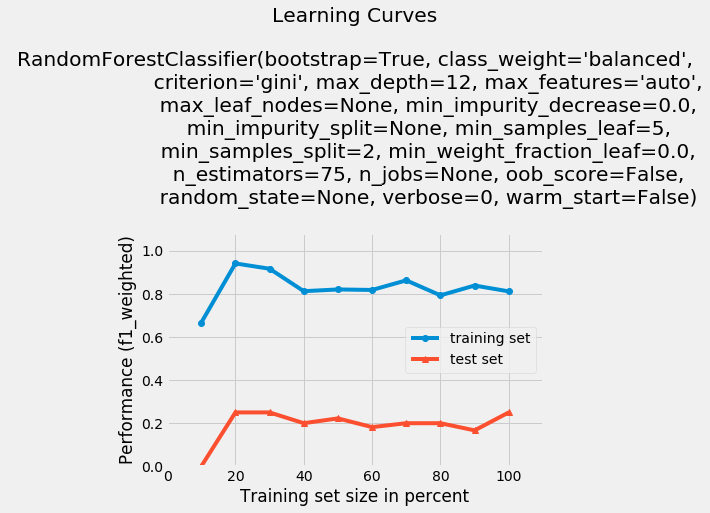

In [48]:
from mlxtend.plotting import plot_learning_curves

rf = RandomForestClassifier(n_estimators = 75, max_depth = 12, 
                            min_samples_leaf = 5, class_weight = 'balanced')

plot_learning_curves(X_train_nopro, y_train, X_test_nopro, y_test, rf, scoring = 'f1_weighted')

# Feature Engineering

___

We will try to add some features based on some google search for the various test data available. We will find the valid ranges and add categorical features for each.

- `bilirubin` : For adults over 18, normal total bilirubin can be up to 1.2 milligrams per deciliter (mg/dl) of blood. For those under 18, the normal level will be will be 1 mg/dl. 

- `alk phosphate` : The ALP level in healthy adults should be 20–140 units per liter (U/L).

- `sgot` : The normal range of an SGOT test is generally between 8 and 45 units per liter of serum. In general, men may naturally have higher amounts of AST in the blood. A score above 50 for men and 45 for women is high and may indicate damage.

- `albumin` : The normal range is 3.5 to 5.5 g/dL or 35-55 g/liter. 

In [49]:
X_train_new, X_test_new = X_train.copy(), X_test.copy()

In [50]:
X_train_new[['age', 'bilirubin', 'alk phosphate', 'sgot', 'albumin']].describe()

,age,bilirubin,alk phosphate,sgot,albumin
count,124.000,124.000,124.000,124.00,124.000
mean,41.097,1.401,101.337,84.20,3.790
std,12.339,1.119,47.717,92.06,0.667
min,7.000,0.400,26.000,14.00,2.100
25%,32.000,0.700,71.750,30.75,3.400
50%,39.000,1.000,85.000,58.00,3.950
75%,50.000,1.585,122.700,98.00,4.200
max,78.000,8.000,295.000,648.00,6.400


#### Create bins for numeric variables and generate new categorical features using pd.cut()

In [61]:
def feature_engg(df) :
    df['bilirubin_normal'] = pd.cut(df.bilirubin, bins=[0, 1.2, float('Inf')], labels = [0, 1])
    df['alk phosphate_normal'] = pd.cut(df['alk phosphate'], bins=[20, 140, float('Inf')], labels = [0, 1])
    df['sgot_normal'] = pd.cut(df.sgot, bins=[8, 45, float('Inf')], labels = [0, 1])
    df['albumin_normal']= pd.cut(df.albumin, bins=[0, 3.5, 5.5, float('Inf')], labels = [2, 0, 1])

    df.drop(['bilirubin', 'alk phosphate', 'sgot', 'albumin'], axis = 1, inplace = True)
    
    return df

In [62]:
X_train_new = feature_engg(X_train_new)
X_test_new = feature_engg(X_test_new)

In [63]:
X_train_new.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,protime,histology,bilirubin_normal,alk phosphate_normal,sgot_normal,albumin_normal
74,50.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,55.2,1.0,1,0,1,0
142,51.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,63.0,2.0,0,0,0,2
131,31.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,74.4,2.0,1,0,1,2
84,62.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,58.0,1.0,1,1,1,0
141,54.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,43.0,2.0,1,0,0,2


In [64]:
estimators = [(RandomForestClassifier(), {'n_estimators' : [50, 75], 'max_depth' : [12, 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10]}), 
              (RandomForestClassifier(), {'n_estimators' : [50, 75], 'max_depth' : [12, 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10], 'class_weight' : ['balanced']})]

for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X_train_new, y_train, X_test_new, 
                                                            estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_train, pred_train, y_test, pred_test)
    

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 RandomForestClassifier 

{'max_depth': 12, 'min_samples_leaf': 5, 'n_estimators': 50} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           1       0.96      0.71      0.81        31
           2       0.91      0.99      0.95        93

    accuracy                           0.92       124
   macro avg       0.93      0.85      0.88       124
weighted avg       0.92      0.92      0.92       124


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           1       0.17      1.00      0.29         1
           2       1.00      0.83      0.91        30

    accuracy                           0.84        31
   macro avg       0.58      0.92      0.60        31
weighted avg       0.97      0.84      0.89        31

			 RandomForestClassifier 

{'class_weight': 'balanced', 'max_depth': 16, 'min_samples_leaf': 5, 'n_estimators': 50} 



               CLASSIFICAT

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


___